In [17]:
from PIL import Image
from IPython.display import display
import random
import json
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 as cv


In [30]:
# 每一张图片都由一系列的特征组成
# 每个特征的权重定义了其稀有度，加起来的和 100
# 定义脸部稀有度
face = ["monkey", "gold","zomber","UFO"]
face_weights = [75,11,11,3]
# 定义衣服稀有度
clothes = ["red hot", "yellow", "black gan", "Ocean","WINTER","greenKing"]
clothes_weights = [14,45,13,13,5,10]
# 定义眼睛稀有度
eyes = ["RGB", "ocean", "air", "bluegay", "origeSun"]
eyes_weights = [71, 10, 2 , 14 , 3]
# 定义发型稀有度
hair = ['fashion Hair', 'winter Hair', 'KING', 'scholar', 'UFO', 
 'WUKONG']
hair_weights = [10 , 20 , 10 , 30 ,20, 10]
# 定义嘴巴稀有度
hand = ['mask', 'smoking', 'BIGsmo', 'green', 
 'Drink']
hand_weights = [30, 15,10, 30,15]
# 定义鼻子稀有度
other = ['Duckkk', 'Wing',"god","ring","catmask"]
other_weights = [4,1,5,80,10]


In [51]:
# 特征分类
face_files = {
    "monkey":"face1", 
    "gold":"face2",
    "zomber":"face3",
    "UFO":"face4"
}
clothes_files = {
    "red hot":"clothes1",
    "yellow":"clothes2",
    "black gan":"clothes3",
    "Ocean":"clothes4",
    "WINTER":"clothes5",
    "greenKing":"clothes6"
}
eyes_files = {
 "RGB":"eye1", "ocean":"eye2", "air":"eye3", "bluegay":"eye4", 
    "origeSun":"eye5"
}
hair_files = {
 'fashion Hair':"hat1", 'winter Hair':"hat2", 'KING':"hat3", 'scholar':"hat4",
    'UFO':"hat5", 
 'WUKONG':"hat6"
}
hand_files = {
 'mask':"hand1", 'smoking':"hand2", 'BIGsmo':"hand3", 'green':"hand4", 
 'Drink':"hand5"
}
other_files = {
    'Duckkk':"other1", 'Wing':"other2","god":"other3","ring":"other4",
    "catmask":"other5"
}


In [52]:
## 生成图像特征
TOTAL_IMAGES = 1000 # 设置指定要生成的头像数量
# 创建一个特征组合空列表，之后每个头像的特征组合信息将不断被保存到这个列表中
# 在生成头像时，将根据这个列表从本地提取对应的特征图层组成真正的头像图片
all_images = [] 
# 生成独特图像组合的递归函数
def create_new_image():
     
    new_image = {} #
     # 对于每个特征类别，根据权重（稀有度）选择一个随机特征
    new_image ["Face"] = random.choices(face, face_weights)[0]
    new_image ["Clothes"] = random.choices(clothes, clothes_weights)[0]
    new_image ["Eyes"] = random.choices(eyes, eyes_weights)[0]
    new_image ["Hair"] = random.choices(hair, hair_weights)[0]
    new_image ["Hand"] = random.choices(hand, hand_weights)[0]
    new_image ["Other"] = random.choices(other, other_weights)[0]
    if new_image in all_images:
        return create_new_image()
    else:
        return new_image
 
# 对于每个特征类别，根据权重选择一个随机特征
for i in range(TOTAL_IMAGES): 
    new_trait_image = create_new_image() 
    all_images.append(new_trait_image)

In [53]:
# 如果所有头像都是唯一的，则返回 true
def all_images_unique(all_images):
 seen = list()
 return not any(i in seen or seen.append(i) for i in all_images)
print("确认所有头像唯一", all_images_unique(all_images))
# 向每个头像添加令牌Id
i = 0
for item in all_images:
 item["tokenId"] = i
 i = i + 1


确认所有头像唯一 True


In [54]:
print(all_images)


[{'Face': 'gold', 'Clothes': 'Ocean', 'Eyes': 'ocean', 'Hair': 'winter Hair', 'Hand': 'green', 'Other': 'Duckkk', 'tokenId': 0}, {'Face': 'monkey', 'Clothes': 'black gan', 'Eyes': 'RGB', 'Hair': 'WUKONG', 'Hand': 'green', 'Other': 'ring', 'tokenId': 1}, {'Face': 'monkey', 'Clothes': 'yellow', 'Eyes': 'RGB', 'Hair': 'WUKONG', 'Hand': 'green', 'Other': 'god', 'tokenId': 2}, {'Face': 'zomber', 'Clothes': 'yellow', 'Eyes': 'RGB', 'Hair': 'UFO', 'Hand': 'mask', 'Other': 'ring', 'tokenId': 3}, {'Face': 'monkey', 'Clothes': 'yellow', 'Eyes': 'RGB', 'Hair': 'scholar', 'Hand': 'mask', 'Other': 'ring', 'tokenId': 4}, {'Face': 'monkey', 'Clothes': 'yellow', 'Eyes': 'RGB', 'Hair': 'UFO', 'Hand': 'mask', 'Other': 'Duckkk', 'tokenId': 5}, {'Face': 'UFO', 'Clothes': 'red hot', 'Eyes': 'RGB', 'Hair': 'winter Hair', 'Hand': 'mask', 'Other': 'ring', 'tokenId': 6}, {'Face': 'monkey', 'Clothes': 'yellow', 'Eyes': 'RGB', 'Hair': 'scholar', 'Hand': 'smoking', 'Other': 'ring', 'tokenId': 7}, {'Face': 'monkey

In [55]:
# 统计独立特征分布
# 为每个特征定义一个字典，并使用它们各自的分类，从 0 开始
face_count = {}
for item in face:
    face_count[item] = 0

clothes_count = {}
for item in clothes:
    clothes_count[item] = 0

eyes_count = {}
for item in eyes:
    eyes_count[item] = 0
 
hair_count = {}
for item in hair:
    hair_count[item] = 0
 
hand_count = {}
for item in hand:
    hand_count[item] = 0
 
other_count = {}
for item in other:
    other_count[item] = 0

In [56]:
for image in all_images:
    face_count[image["Face"]] += 1
    clothes_count[image["Clothes"]] += 1
    eyes_count[image["Eyes"]] += 1
    hair_count[image["Hair"]] += 1
    hand_count[image["Hand"]] += 1
    other_count[image["Other"]] += 1

In [57]:
print(face_count)
print(clothes_count)
print(eyes_count)
print(hair_count)
print(hand_count)
print(other_count)

{'monkey': 603, 'gold': 170, 'zomber': 164, 'UFO': 63}
{'red hot': 152, 'yellow': 368, 'black gan': 155, 'Ocean': 154, 'WINTER': 58, 'greenKing': 113}
{'RGB': 556, 'ocean': 156, 'air': 28, 'bluegay': 209, 'origeSun': 51}
{'fashion Hair': 118, 'winter Hair': 182, 'KING': 121, 'scholar': 257, 'UFO': 190, 'WUKONG': 132}
{'mask': 268, 'smoking': 172, 'BIGsmo': 125, 'green': 267, 'Drink': 168}
{'Duckkk': 87, 'Wing': 21, 'god': 80, 'ring': 671, 'catmask': 141}


In [58]:
#### 生成头像图片
# 定义输出目录
output_path="./data/result/open_punks/"
if not os.path.exists(output_path):
    os.mkdir(output_path)
# 使用 PIL 在图层目录中选择各个的特征图像aa
 # 由于我们的头像需要通过六个面部特征组合，所以分别在六个目录中提取图片

# 使用 PIL 在图层目录中选择各个的特征图像
for item in all_images:
    
    im1 = Image.open(f'./data/parts/face/{face_files[item["Face"]]}.png').convert('RGBA')
 
    im2 = Image.open(f'./data/parts/eyes/{eyes_files[item["Eyes"]]}.png').convert('RGBA')
 
    im3 = Image.open(f'./data/parts/clothes/{clothes_files[item["Clothes"]]}.png').convert('RGBA')
 
    im4 = Image.open(f'./data/parts/hair/{hair_files[item["Hair"]]}.png').convert('RGBA')
 
    im5 = Image.open(f'./data/parts/hand/{hand_files[item["Hand"]]}.png').convert('RGBA')
 
    im6 = Image.open(f'./data/parts/other/{other_files[item["Other"]]}.png').convert('RGBA')
 # 将从每个特征目录中提取的特征进行叠加
 # 由于图层均为 png 透明图片，很自然的组合为头像
    com1 = Image.alpha_composite(im1, im2)
    com2 = Image.alpha_composite(com1, im3)
    com3 = Image.alpha_composite(com2, im4)
    com4 = Image.alpha_composite(com3, im5)
    com5 = Image.alpha_composite(com4, im6)
 # 转换为 RGB 模型，以便在 Notebook 中显示
    rgb_im = com5.convert('RGB')
    file_name = str(item["tokenId"]) + ".png"
 
# 将头像保存到本地结果输出目录
    rgb_im.save("./data/result/open_punks/" + file_name)

采样输出 100 个 NFT 头像


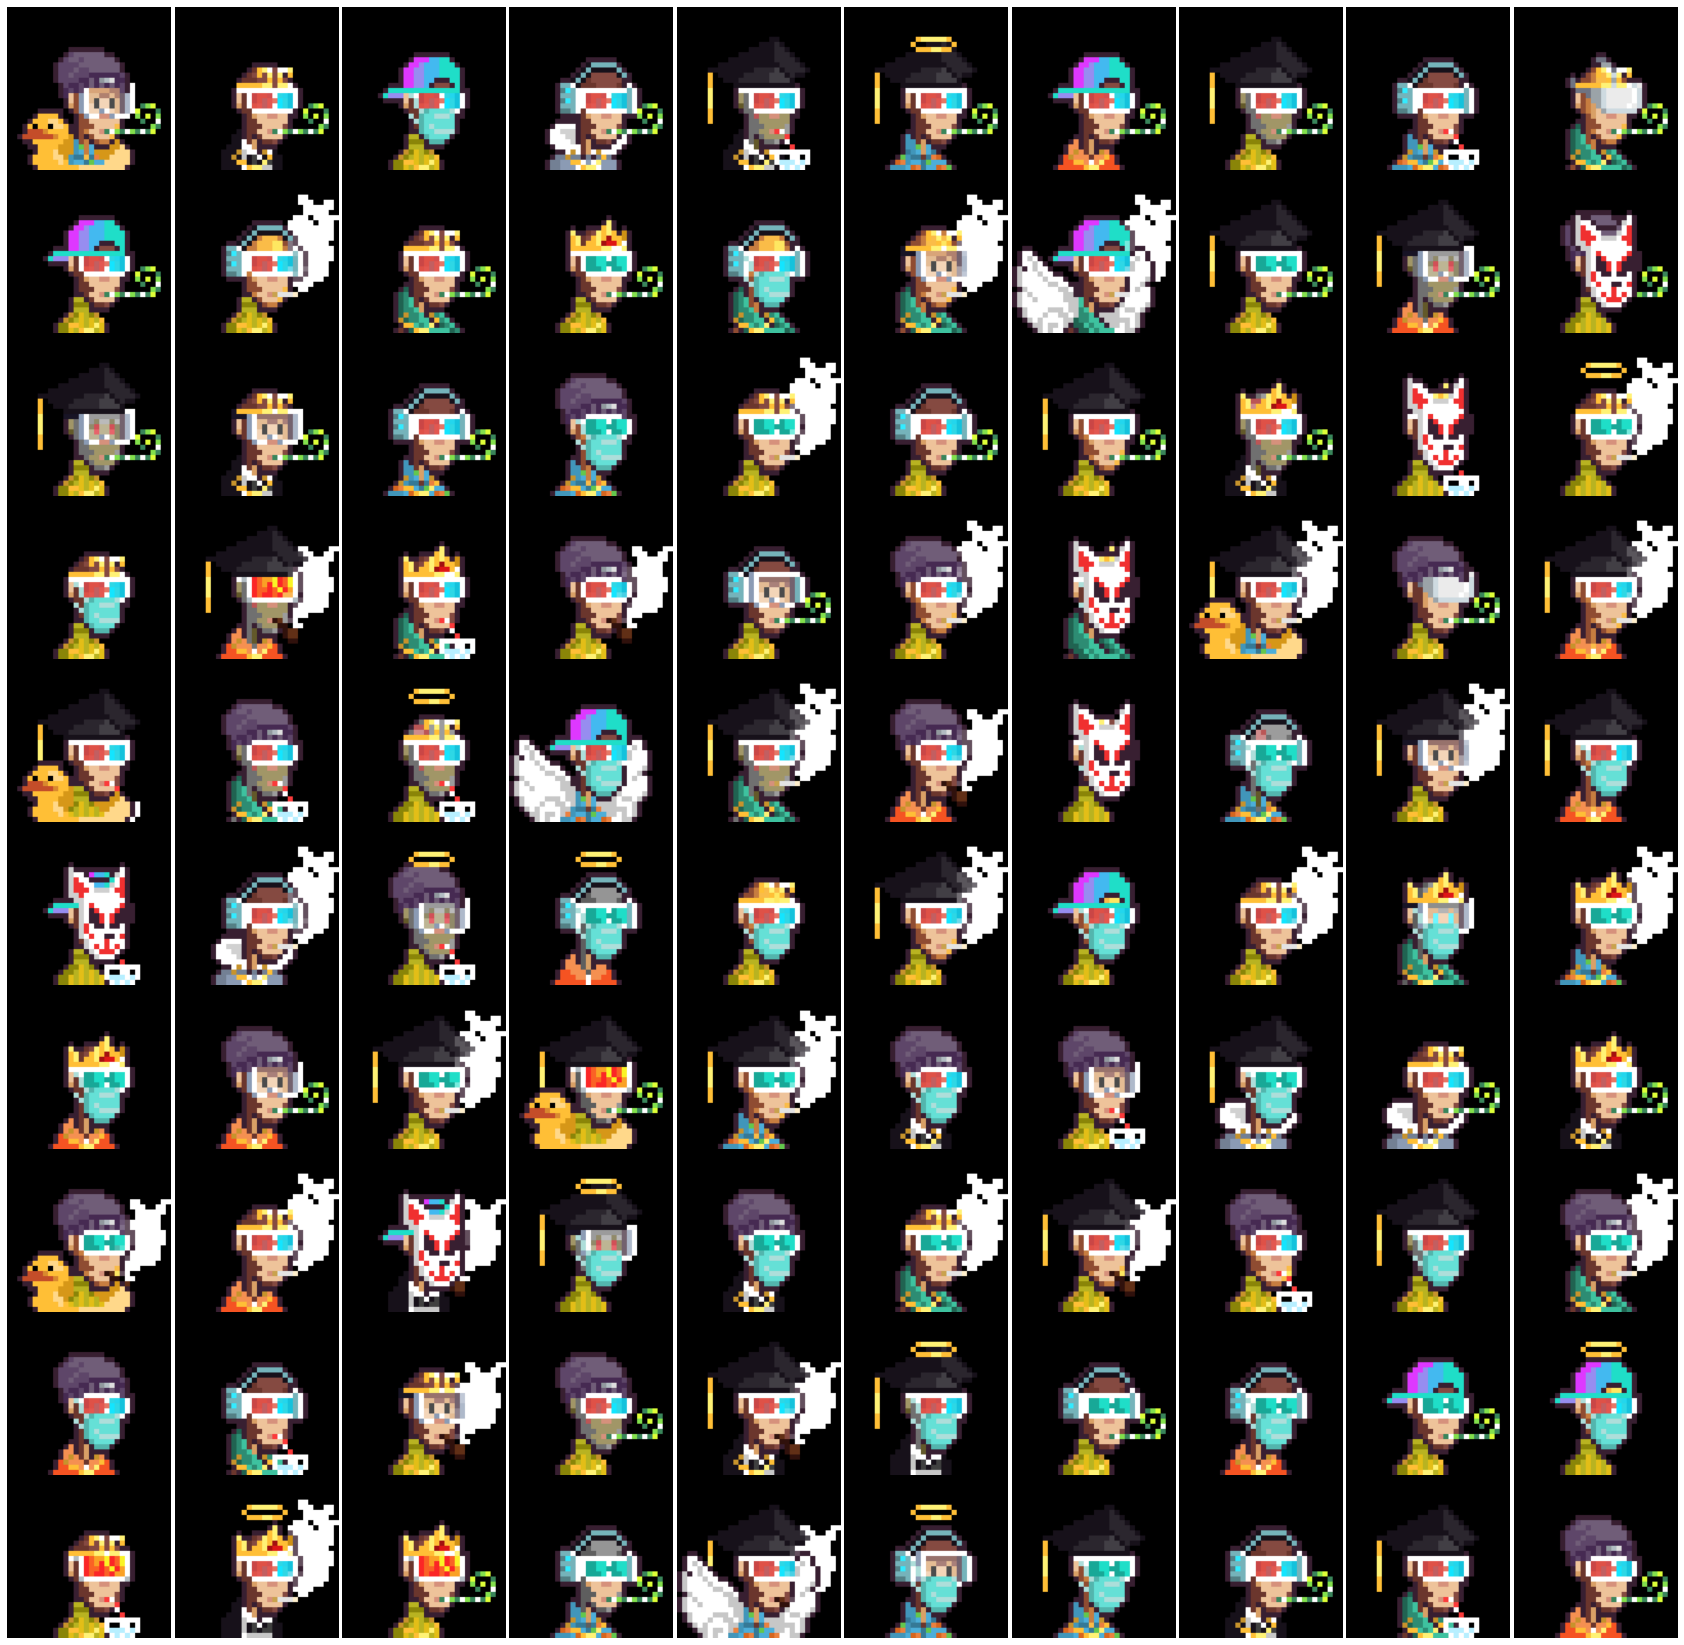

In [59]:
# 输出 100 个样本进行查验
# 定义行和列
no_plots = 10*10
# 定义图像路径
images = glob.glob("./data/result/open_punks/*.png")
plt.rcParams['figure.figsize'] = (30, 30)
plt.subplots_adjust(wspace=0, hspace=0)
print("采样输出 100 个 NFT 头像")
for idx,image in enumerate(images[:no_plots]):
 sample_img = cv.imread(image)
 plt.subplot(10, 10, idx+1)
 plt.axis('off')
 plt.imshow(cv.cvtColor(sample_img,cv.COLOR_BGR2RGB)) #covert color space
plt.show()